In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getPathXYs(inputFilePath):
    np_path_XYs = np.genfromtxt(inputFilePath , delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:] 
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY) 
        path_XYs.append(XYs)
    return path_XYs

In [3]:
def isLine(points):
    if (len(points) == 2):
        return points
    startPoint = np.array(points[0])
    endPoint = np.array(points[-1])
    totalCost = 0
    for i in range(1, len(points) - 1):
        currPoint = np.array(points[i])
        distance = np.cross(endPoint-startPoint,currPoint-startPoint)/np.linalg.norm(endPoint-startPoint)
        totalCost += abs(distance)
    lineLength = np.sqrt((startPoint[0] - endPoint[0])**2 + (startPoint[1] - endPoint[1])**2)
    totalCost /= lineLength
    if (totalCost <= 3):
        return np.array([points[0], points[-1]])
    return points

In [4]:
def plotBefore(paths_XYs, title, ax):
    for i, XYs in enumerate(paths_XYs):
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(title)

def plotAfter(paths_XYs, title, ax):
    for i, XYs in enumerate(paths_XYs):
        for XY in XYs:
            XY = isLine(XY)
            ax.plot(XY[:, 0], XY[:, 1], linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(title)

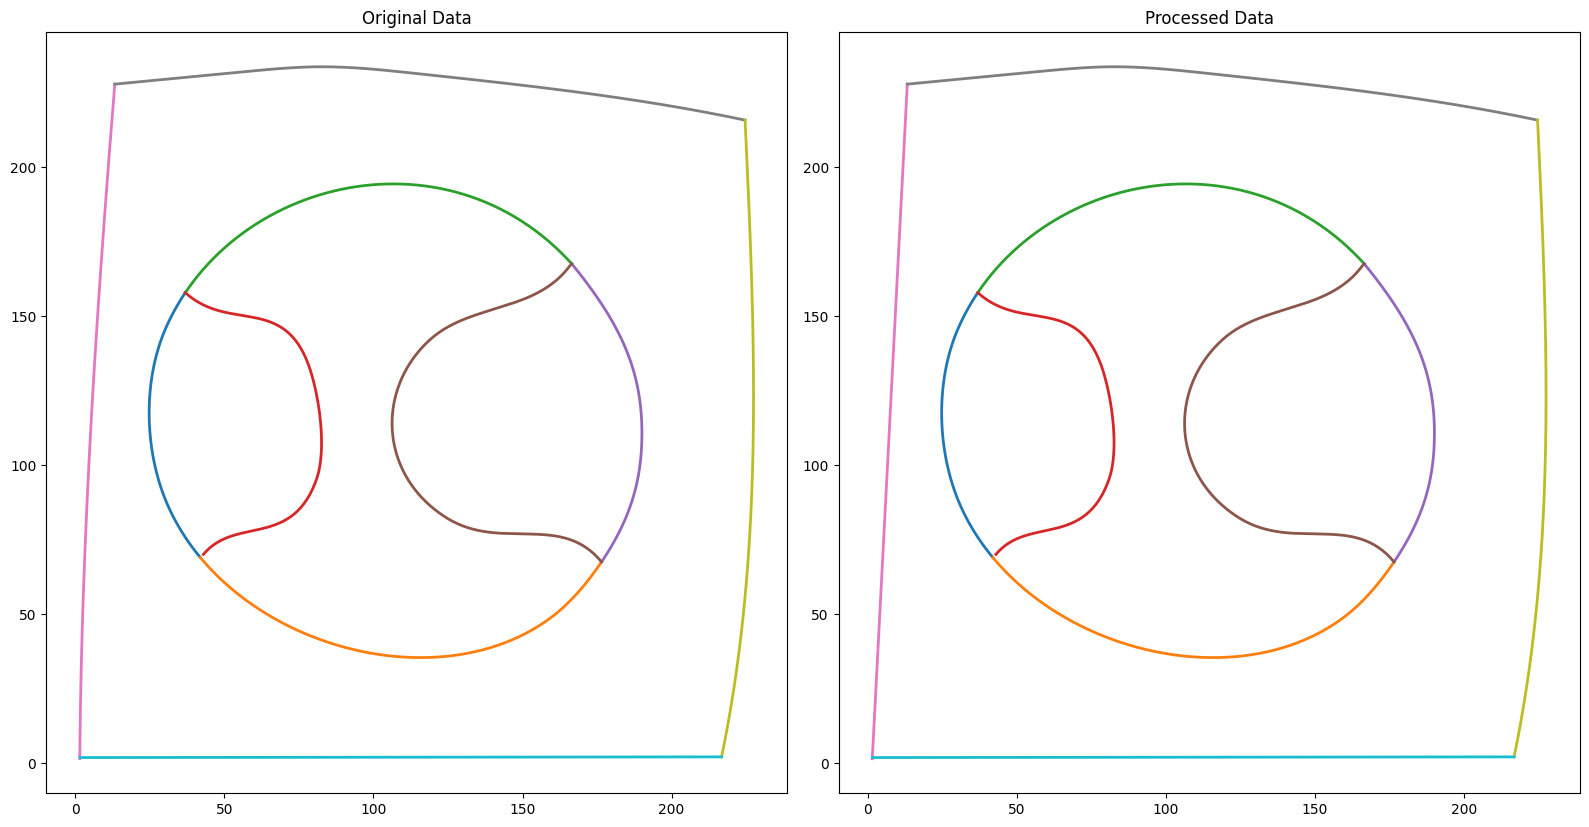

In [5]:
path_XYs = getPathXYs('/kaggle/input/adobe-gfg-dataset/frag0.csv')
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plotBefore(path_XYs, 'Original Data', axs[0])
plotAfter(path_XYs, 'Processed Data', axs[1])
plt.show()

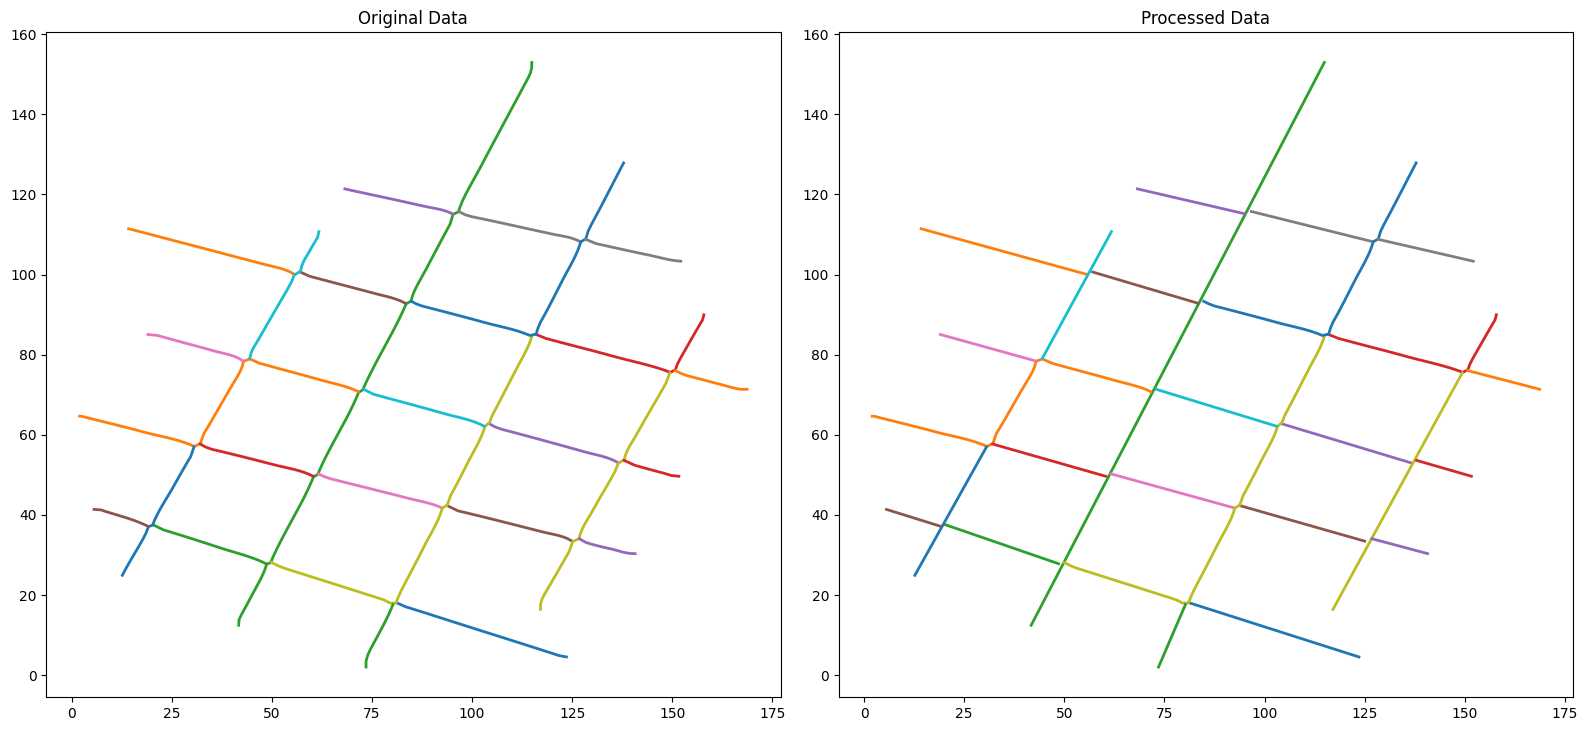

In [6]:
path_XYs = getPathXYs('/kaggle/input/adobe-gfg-dataset/frag2.csv')
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(16, 8))
plotBefore(path_XYs, 'Original Data', axs[0])
plotAfter(path_XYs, 'Processed Data', axs[1])z
plt.show()